In [1]:
from db_utils import loading_data

loan_payments_df = loading_data()

In [2]:
loan_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [3]:
loan_payments_df.head(5)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [4]:
original_df = loan_payments_df.copy()

In [5]:
from data_transform import DataTransform

transformer = DataTransform(loan_payments_df)
transformed_df = transformer.transform()

In [6]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  category      
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

In [7]:
from data_frame_info import DataFrameInfo

info = DataFrameInfo(transformed_df)

In [8]:
info.null_value_count(as_percentage=True)

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

In [9]:
for_visual_plot_df = transformed_df.copy()

In [10]:
from data_frame_transform import DataFrameTransform

df_transform = DataFrameTransform(transformed_df, threshold=0.1)

In [11]:
df_transform.drop_high_null_columns()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,NaN,1,INDIVIDUAL


In [12]:
imputed_df = df_transform.impute_missing_values()

In [13]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        54231 non-null  category      
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           54231 non-null  category      
 11  home_ownership              54231 non-null  category  

In [14]:
info.null_value_count(as_percentage=True)

id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
total_rec_int 

In [15]:
analysis_df = imputed_df.copy()

In [16]:
from plotter import Plotter

visualise = Plotter(imputed_df)

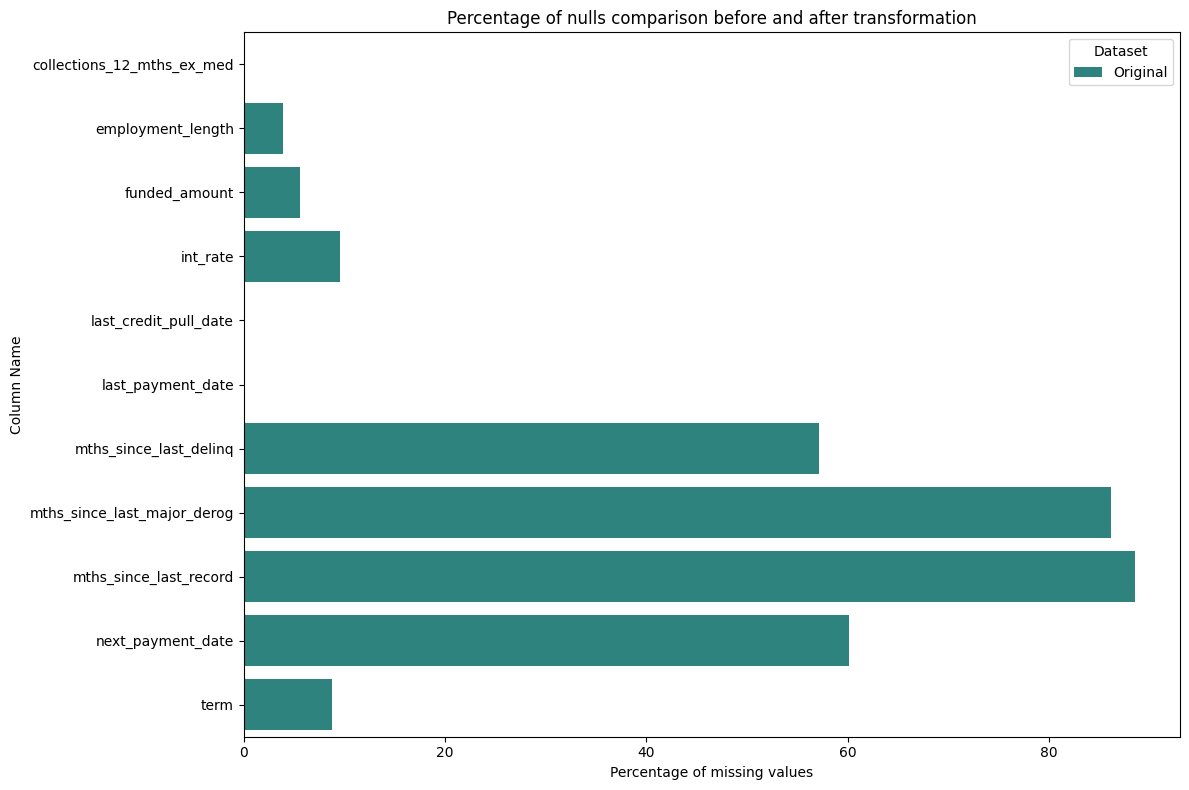

In [17]:
#To visualise all columns before any columns are dropped from DataFrame
visualise.removal_of_null_visualised(original_df)

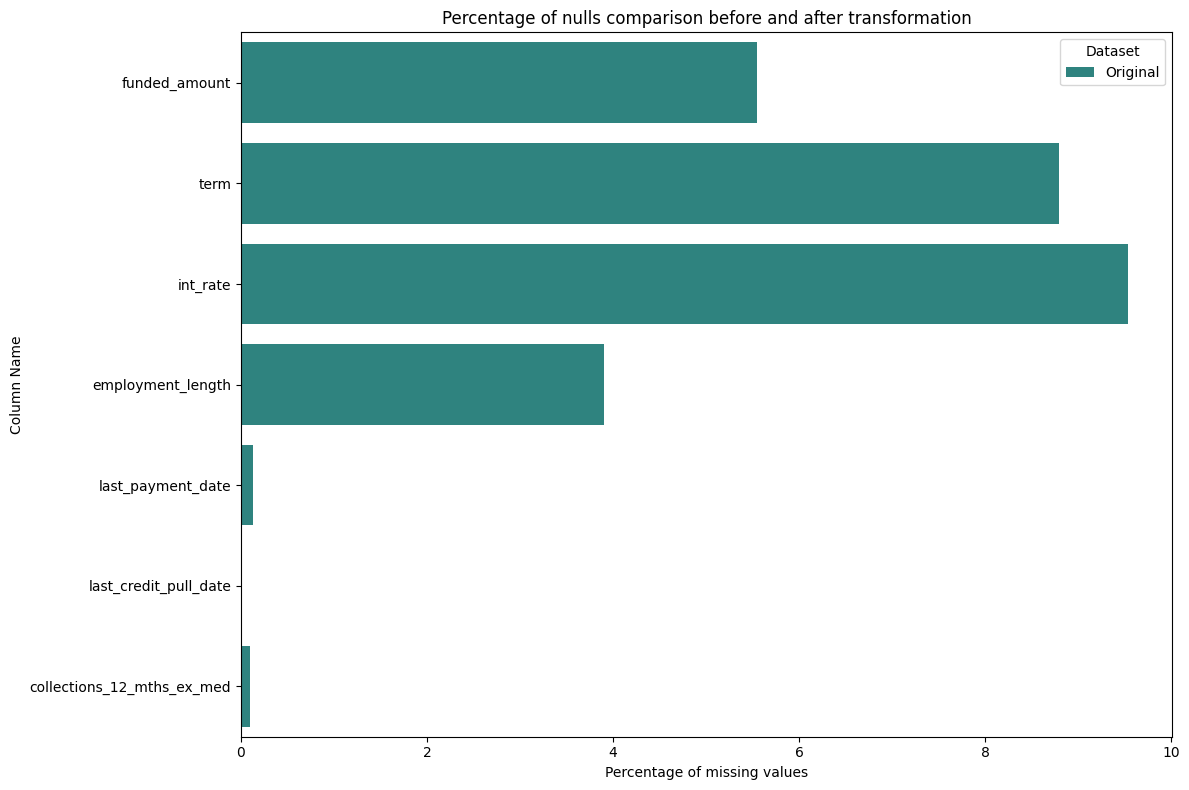

In [18]:
#To visualise columns that have not been dropped but needed data imputed
visual_transform = DataFrameTransform(for_visual_plot_df, threshold=0.2)
visual_transform.drop_high_null_columns()
visual = Plotter(imputed_df)
visual.removal_of_null_visualised(for_visual_plot_df)

In [19]:
from skewed_data import SkewedData

analysis = SkewedData(analysis_df)

In [20]:
skewed_columns = analysis.skew_check(threshold=1)

In [21]:
vis_analysis = Plotter(analysis_df)

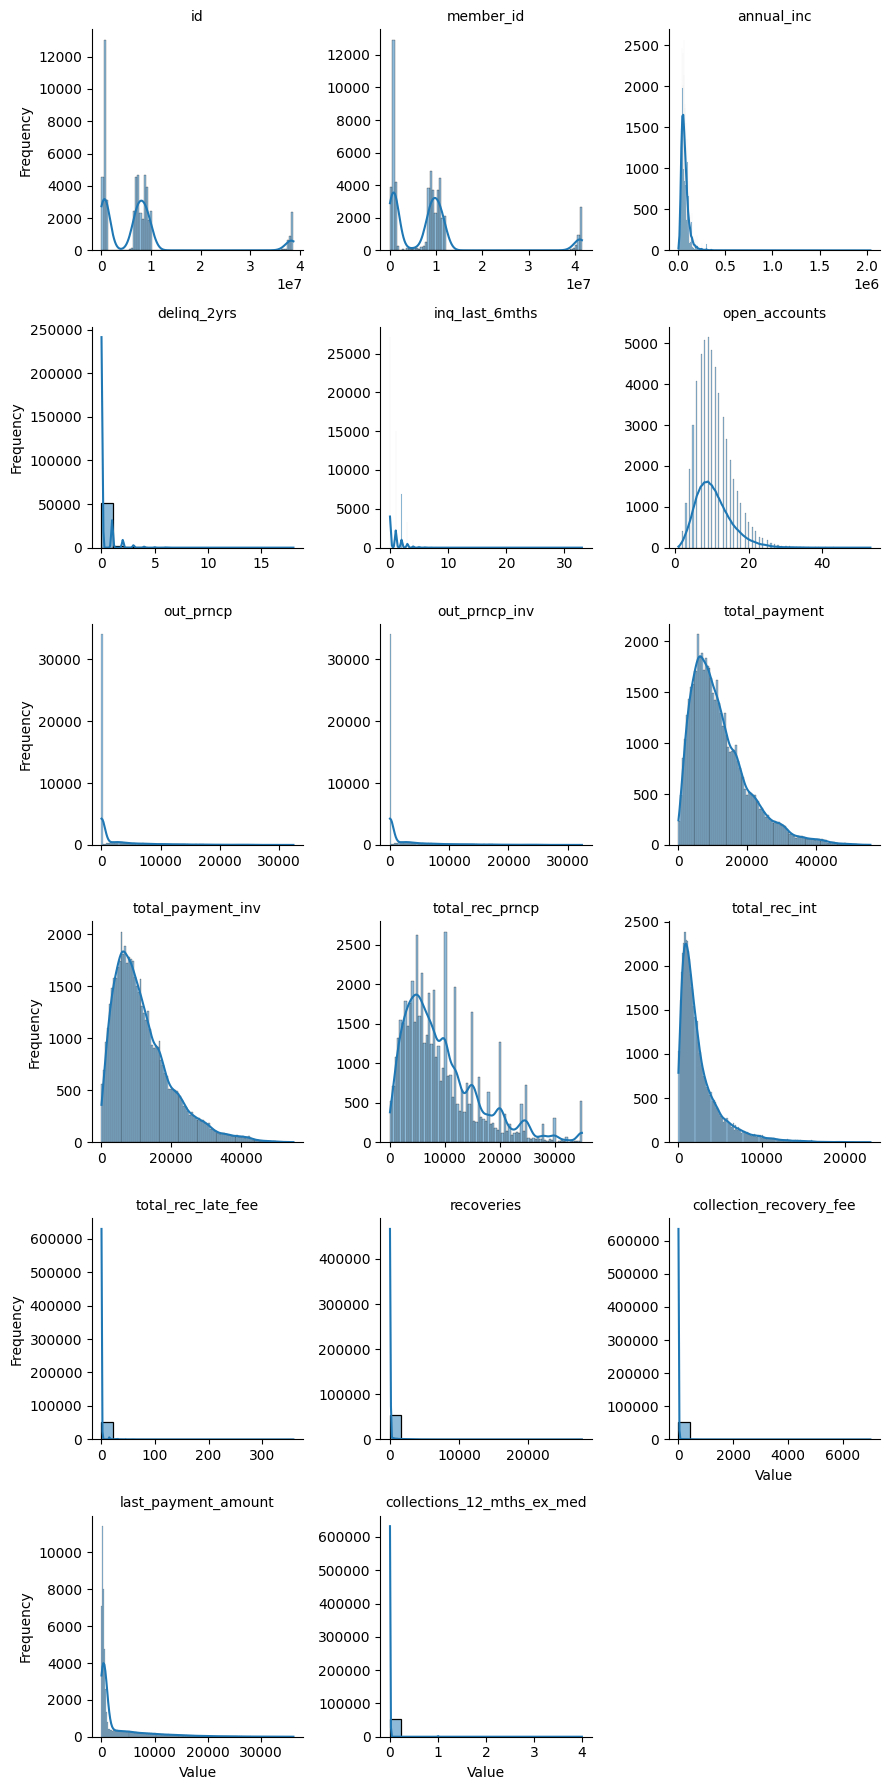

In [22]:
vis_analysis.skew_plotted(skewed_columns)

In [24]:
transform_skew = DataFrameTransform(analysis_df)

In [25]:
transform_skew.transform_skewed_columns(skewed_columns)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,17.470733,17.540284,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,10.736397,Not Verified,2021-01-01,Current,n,credit_card,19.54,0.693147,1987-10-01,0.000000,2.484907,27,8.617889,8.617889,8.000521,8.000521,7.812095,6.238735,0.000000,0.000000,0.000000,2022-01-01,5.516730,2022-01-01,0.0,1,INDIVIDUAL
1,17.470218,17.539757,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,10.819778,Not Verified,2021-01-01,Current,n,credit_card,24.20,0.000000,2001-09-01,0.000000,2.708050,31,9.116341,9.116341,8.493947,8.493947,8.318052,6.669422,0.000000,0.000000,0.000000,2022-01-01,6.010090,2022-01-01,0.0,1,INDIVIDUAL
2,17.470217,17.539756,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,11.210644,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0.000000,1998-09-01,0.000000,1.945910,18,0.000000,0.000000,9.730594,9.730594,9.680344,6.714826,0.000000,0.000000,0.000000,2021-10-01,9.461112,2021-10-01,0.0,1,INDIVIDUAL
3,17.470216,17.539756,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,10.645425,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0.000000,2008-06-01,0.000000,1.791759,13,0.000000,0.000000,9.677055,9.677055,9.615805,6.853795,0.000000,0.000000,0.000000,2021-06-01,9.539620,2021-06-01,0.0,1,INDIVIDUAL
4,17.470216,17.539755,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,11.884489,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0.000000,2002-04-01,0.000000,3.135494,50,9.239654,9.239654,8.607666,8.607666,8.455856,6.647598,0.000000,0.000000,0.000000,2022-01-01,6.123676,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,11.246313,11.246130,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,12.429216,Not Verified,2013-07-01,Fully Paid,n,other,10.00,0.693147,2003-04-01,0.000000,1.609438,7,0.000000,0.000000,8.652566,7.616919,8.517193,6.585923,0.000000,0.000000,0.000000,2016-07-01,5.078979,2016-07-01,0.0,1,INDIVIDUAL
54227,11.867855,11.221557,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,9.615805,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0.000000,1999-01-01,1.098612,1.791759,6,0.000000,0.000000,8.687990,7.932890,8.517193,6.716970,4.653411,0.000000,0.000000,2016-10-01,6.194426,2016-09-01,0.0,1,INDIVIDUAL
54228,11.670314,11.170125,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,12.611538,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0.000000,1984-02-01,0.000000,2.079442,18,0.000000,0.000000,8.272665,7.819640,8.160518,6.029170,0.000000,0.000000,0.000000,2016-09-01,4.705739,2013-05-01,0.0,1,INDIVIDUAL
54229,11.394750,11.166187,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,4 years,RENT,12.206073,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0.000000,1995-03-01,0.000000,0.693147,2,0.000000,0.000000,8.551436,5.450352,8.517193,5.160089,0.000000,0.000000,0.000000,2014-03-01,0.000000,2013-05-01,0.0,1,INDIVIDUAL


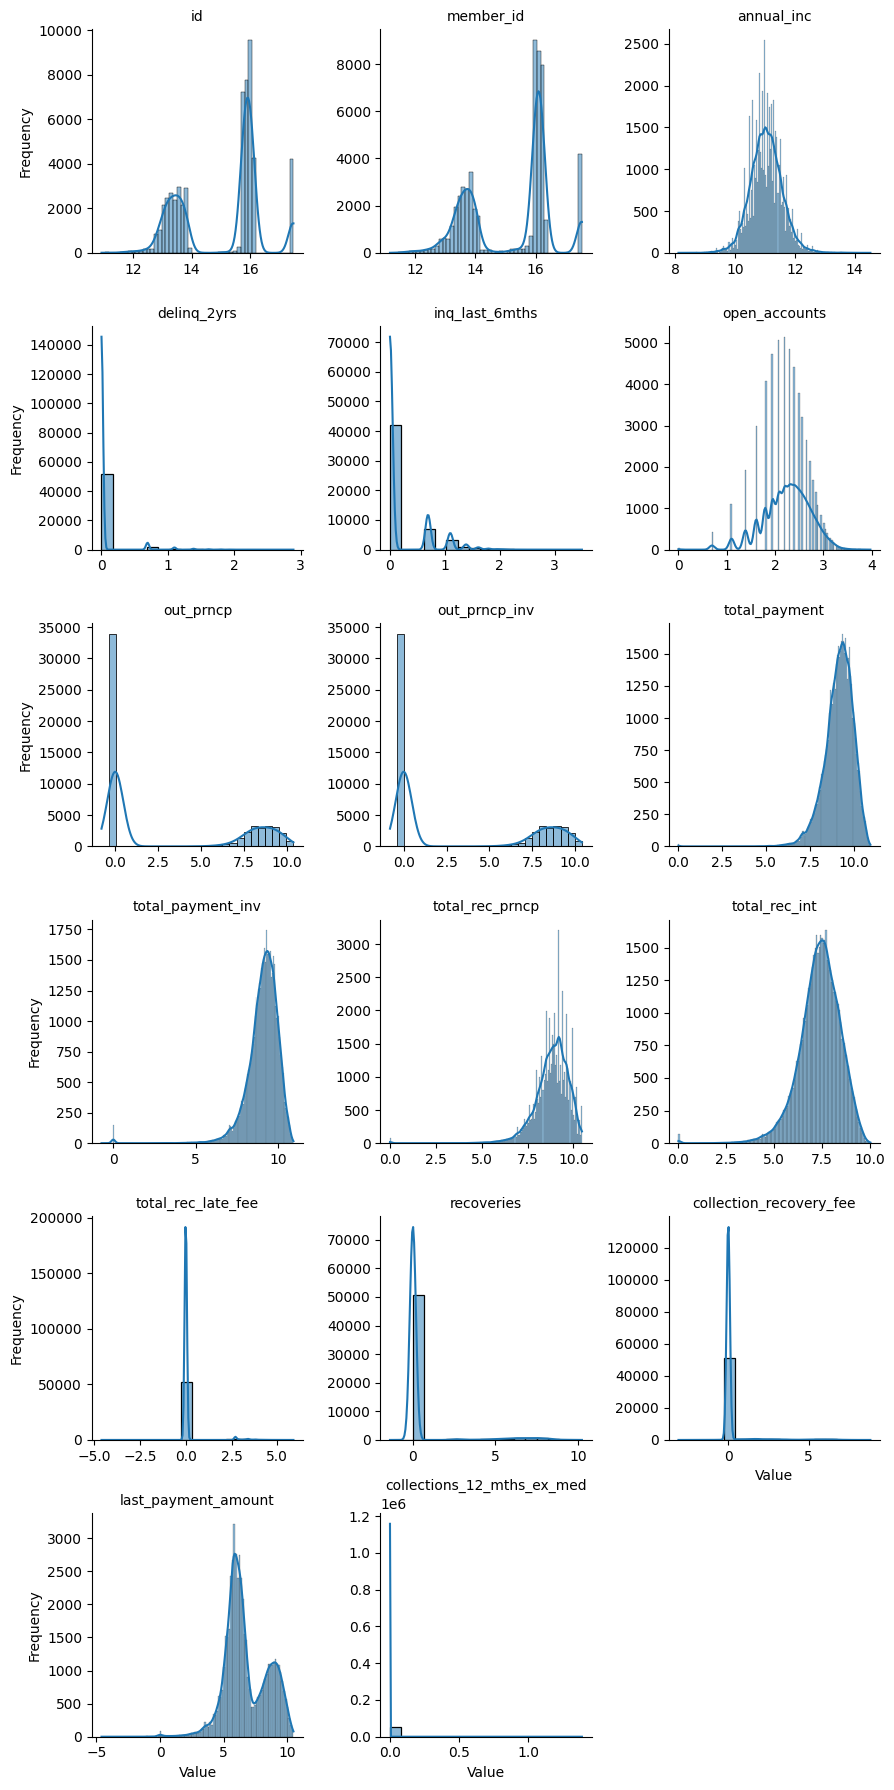

In [26]:
vis_analysis.skew_plotted(skewed_columns)

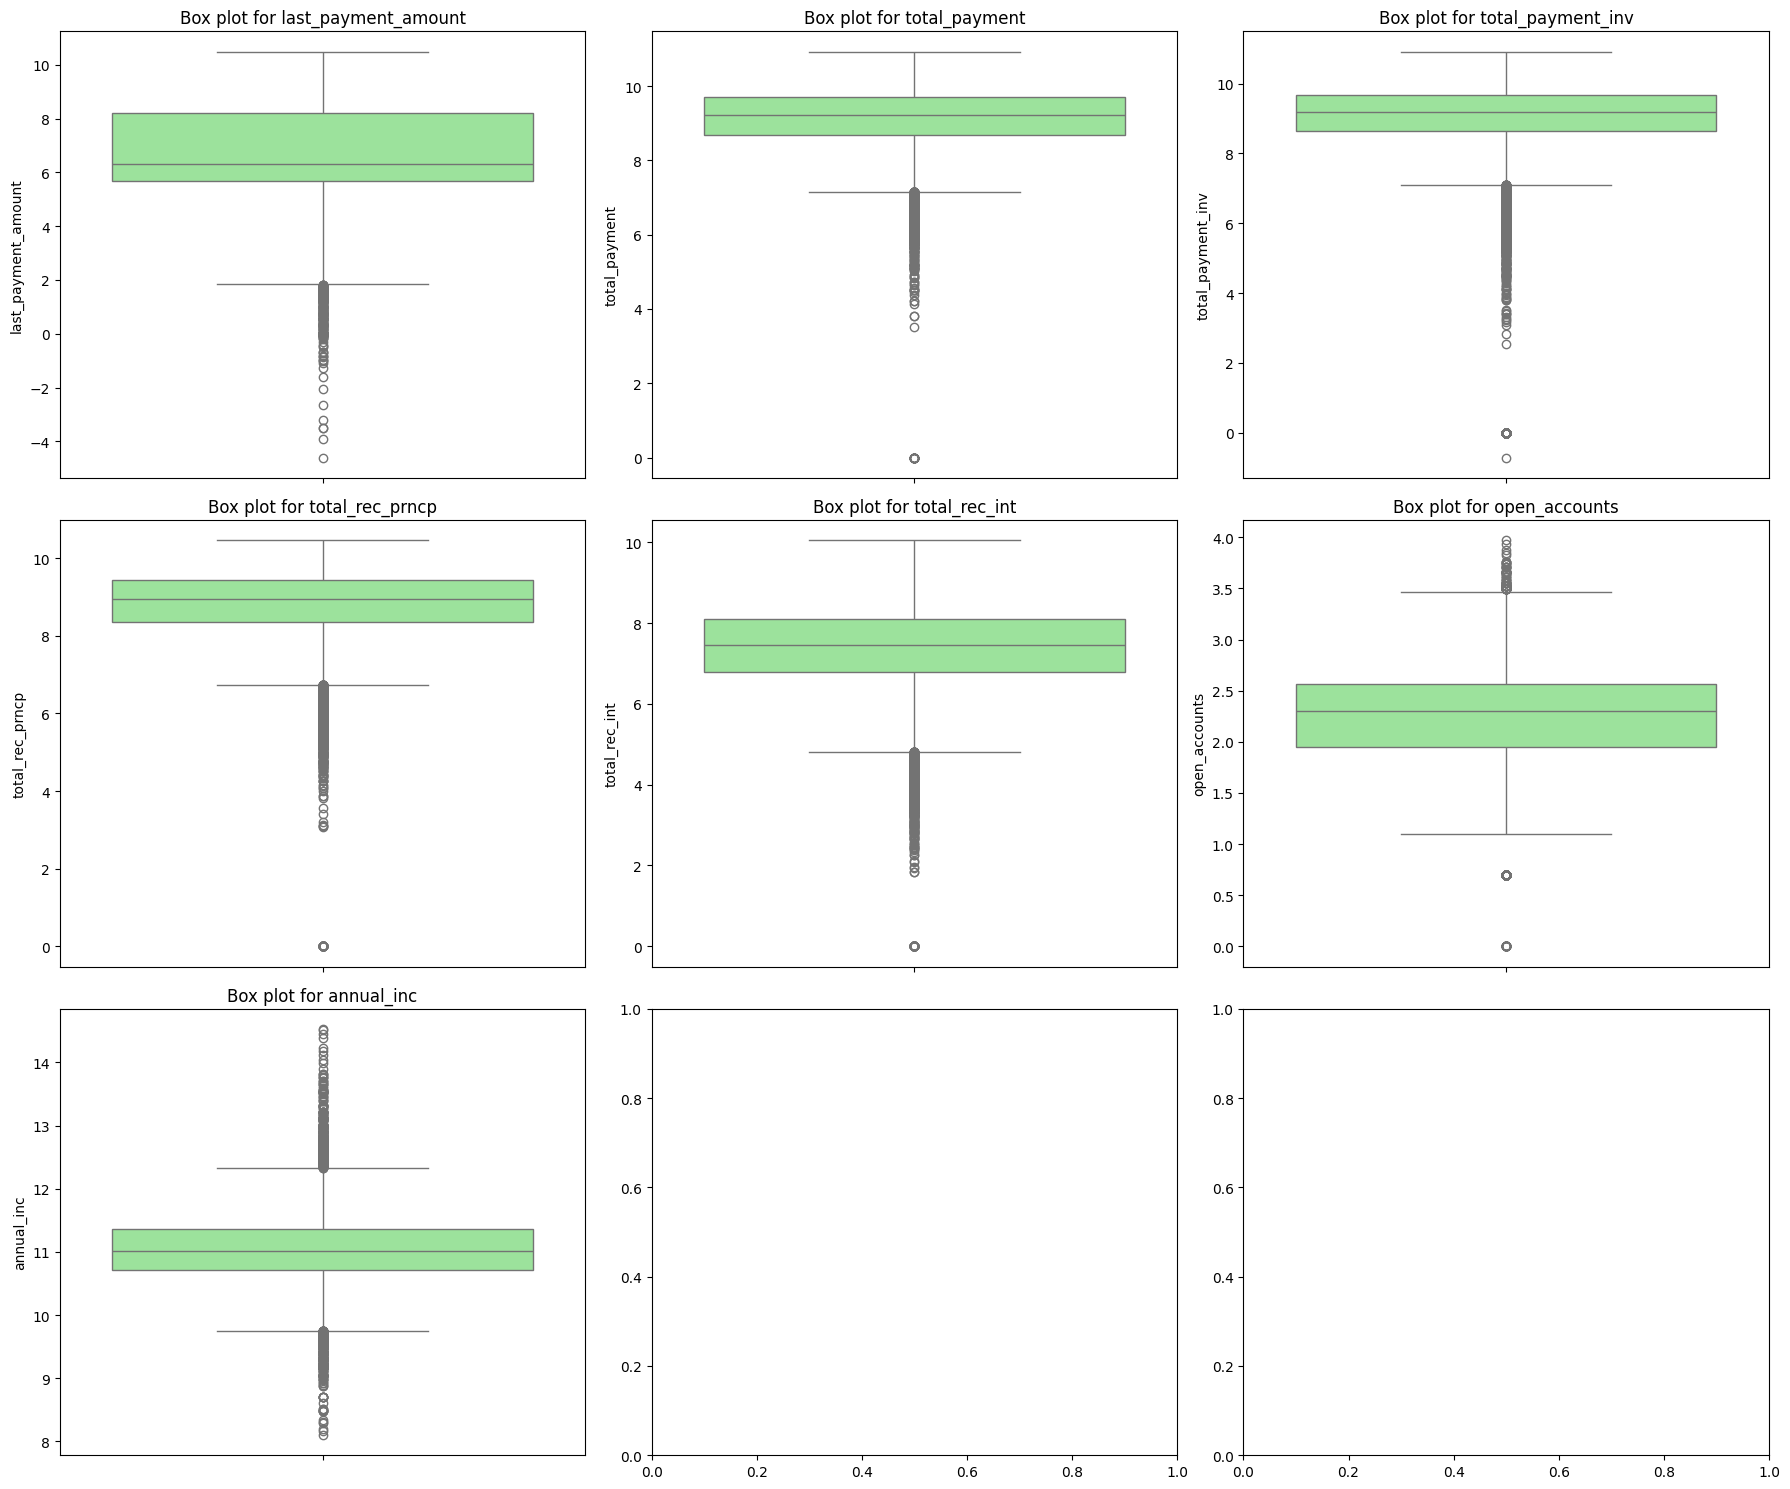

In [27]:
columns_to_check = ['last_payment_amount', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'open_accounts', 'annual_inc']
vis_analysis.view_outliers(columns_to_check, cols=3)